In [2]:
!pip install nltk
!pip instal gensim

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from gensim.models import Word2Vec
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt_tab')
data = []
sample_text="""the bank of the river was covered with lush green grass,
and people were enjoying the peaceful view  on the other side, 
the bank where the financial institution is located had a busy crowd of customers and workers despite the difference in activities, 
both places offered a sense of stability and support to those who visited them"""
sample_text= sample_text.replace("\n", " ")
for i in sent_tokenize(sample_text):
	temp = []
	# tokenize the sentence into words
	for j in word_tokenize(i):
		temp.append(j.lower())
	data.append(temp)
# creating our CBOW model
model1 = gensim.models.Word2Vec(data, min_count=1,
								vector_size=2, window=5)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ujwal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [13]:
print("Cosine similarity between 'bank' " +"and 'financial' - CBOW : ",model1.wv.similarity('bank', 'financial'))

Cosine similarity between 'bank' and 'grass' - CBOW :  0.90064776


In [14]:
print("Cosine similarity between 'bank' " +"and 'river' - CBOW : ",model1.wv.similarity('bank', 'river'))

Cosine similarity between 'bank' and 'river' - CBOW :  -0.72492427


In [16]:
model1.wv.get_vector('bank')

array([ 0.36906847, -0.07661173], dtype=float32)

In [17]:
from transformers import BertTokenizer, BertModel
import torch
# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
def get_word_embedding(sentence, target_word):
    # Tokenize input sentence
    inputs = tokenizer(sentence, return_tensors="pt") 
    # Forward pass through BERT
    with torch.no_grad():
        outputs = model(**inputs)
    # Extract hidden states (last layer) from BERT
    hidden_states = outputs.last_hidden_state
    # Find the position of the target word
    target_index = inputs.input_ids[0].tolist().index(tokenizer.encode(target_word, add_special_tokens=False)[0])
    # Extract the embedding for the target word (average of the token embeddings)
    target_embedding = hidden_states[0, target_index].numpy()
    return target_embedding
# Example sentences with the word "bank"
sentence1 = "I went to the bank of the river to relax."
sentence2 = "I deposited money into my bank account this morning."
# Get embeddings for both contexts of the word "bank"
embedding1 = get_word_embedding(sentence1, "bank")
embedding2 = get_word_embedding(sentence2, "bank")
print("Embedding for 'bank' in river context:")
print(embedding1)
print("\nEmbedding for 'bank' in financial context:")
print(embedding2)


C:\Users\ujwal\Twin_tower_model\twin_model\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Embedding for 'bank' in river context:
[-2.33406067e-01 -4.92273986e-01 -3.51480424e-01 -5.49867824e-02
 -4.62861836e-01 -7.38765299e-02 -4.78137955e-02  1.59845054e+00
  5.08617535e-02 -5.28456926e-01  1.12227750e+00  4.98486668e-01
  4.85102385e-01  1.54275879e-01 -1.09642434e+00  1.98596925e-01
 -1.10387050e-01 -1.98050916e-01  7.30857193e-01  4.60049897e-01
  1.62699342e-01  3.72431844e-01 -7.90162012e-02  7.05300331e-01
  1.52129367e-01  3.16909432e-01  8.48197579e-01 -3.82809848e-01
  3.58578563e-01  2.07555205e-01  1.28453505e+00  1.88013986e-01
 -4.77095582e-02  3.20771813e-01 -5.72809815e-01 -1.18513867e-01
 -3.12102214e-03 -5.78482985e-01 -3.03711653e-01  1.00537312e+00
 -8.31644833e-01 -1.24726546e+00 -4.94717270e-01  6.69835091e-01
  1.46005750e-02  2.89321661e-01  3.71036977e-02  1.44049719e-01
  1.34086102e-01  2.39730299e-01 -3.64740431e-01  9.86795962e-01
  4.79765758e-02 -7.11301208e-01  1.26156539e-01  2.32834220e-01
 -5.21492183e-01 -9.73514915e-01 -6.55071735e-01 -1

Cosine Similarity: 0.4569116234779358


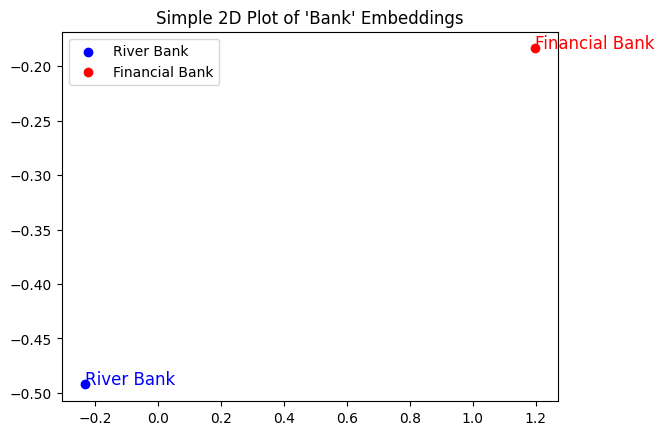

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity between the two embeddings
def compute_cosine_similarity(embedding1, embedding2):
    cosine_sim = cosine_similarity([embedding1], [embedding2])
    return cosine_sim[0][0]
# Compute cosine similarity
similarity = compute_cosine_similarity(embedding1, embedding2)
print(f"Cosine Similarity: {similarity}")
# Simple 2D plot of the embeddings (just plotting the first two values for simplicity)
def simple_visualization(embedding1, embedding2):
    # We can plot just the first two dimensions of each embedding
    plt.scatter(embedding1[0], embedding1[1], color='blue', label="River Bank")
    plt.scatter(embedding2[0], embedding2[1], color='red', label="Financial Bank")
    
    # Adding labels
    plt.text(embedding1[0], embedding1[1], "River Bank", fontsize=12, color='blue')
    plt.text(embedding2[0], embedding2[1], "Financial Bank", fontsize=12, color='red')
    
    # Display plot
    plt.title("Simple 2D Plot of 'Bank' Embeddings")
    plt.legend()
    plt.show()
# Visualize embeddings
simple_visualization(embedding1, embedding2)
